## Setup

In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [2]:
pacman::p_load("DESeq2", "ggplot2", "dplyr", "Seurat", "MuSiC", "Biobase", "ggpubr", "pheatmap", install = FALSE)

In [3]:
CCL4_Cneg <- c("CDL_0002", "CDL_0003", "CDL_0007", "CDL_0008", "CDL_0009", "CDL_0011")
CCL4_Cpos <- c("CDL_0036", "CDL_0037", "CDL_0038", "CDL_0039", "CDL_0040", "CDL_0041")
CCL4_R1 <- c("CDL_0044", "CDL_0045", "CDL_0046", "CDL_0048", "CDL_0049", "CDL_0050")
CCL4_R2 <- c("CDL_0052", "CDL_0054", "CDL_0055", "CDL_0056", "CDL_0057", "CDL_0058")
TAA_Cneg <- c("CDL_0084", "CDL_0086", "CDL_0088", "CDL_0089", "CDL_0090", "CDL_0091")
TAA_Cpos <- c("CDL_0116", "CDL_0117", "CDL_0118", "CDL_0120", "CDL_0121", "CDL_0123")
TAA_R1 <- c("CDL_0124", "CDL_0125", "CDL_0126", "CDL_0127", "CDL_0128", "CDL_0131")
TAA_R2 <- c("CDL_0132", "CDL_0133", "CDL_0134", "CDL_0135", "CDL_0137", "CDL_0138") 

In [4]:
Group_CDL_samples <- function(dataframe){
       dataframe <- dataframe %>%
        mutate(group = case_when(group %in% CCL4_Cneg ~ 'CCL4_Cneg',
                            TRUE ~ as.character (group))) %>%
        mutate(group = case_when(group %in% CCL4_Cpos ~ 'CCL4_Cpos',
                            TRUE ~ as.character (group))) %>%
        mutate(group = case_when(group %in% CCL4_R1 ~ 'CCL4_R1',
                            TRUE ~ as.character (group))) %>%
        mutate(group = case_when(group %in% CCL4_R2 ~ 'CCL4_R2',
                            TRUE ~ as.character (group))) %>%
    
        mutate(group = case_when(group %in% TAA_Cneg ~ 'TAA_Cneg',
                            TRUE ~ as.character (group))) %>% 
        mutate(group = case_when(group %in% TAA_Cpos ~ 'TAA_Cpos',
                            TRUE ~ as.character (group))) %>%
        mutate(group = case_when(group %in% TAA_R1 ~ 'TAA_R1',
                            TRUE ~ as.character (group))) %>%
        mutate(group = case_when(group %in% TAA_R2 ~ 'TAA_R2',
                            TRUE ~ as.character (group)))
    return(dataframe)
} 

In [5]:
dds <- readRDS("03_outputs/03/dds_object_batch_group_wald.rds")

In [6]:
# subset_coldata <- as.data.frame(dds@colData)
# subset_coldata <- as.data.frame(dds@colData) %>%
#   select(isCirrhotic, Regression)

In [7]:
bulk_eset <- Biobase::ExpressionSet(assayData = counts(dds))

## Nault 24 - preparation

In [8]:
sc_nault_24 <- readRDS("01_raw_data/deconvolution/GSE184506/GSE184506.Rds")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



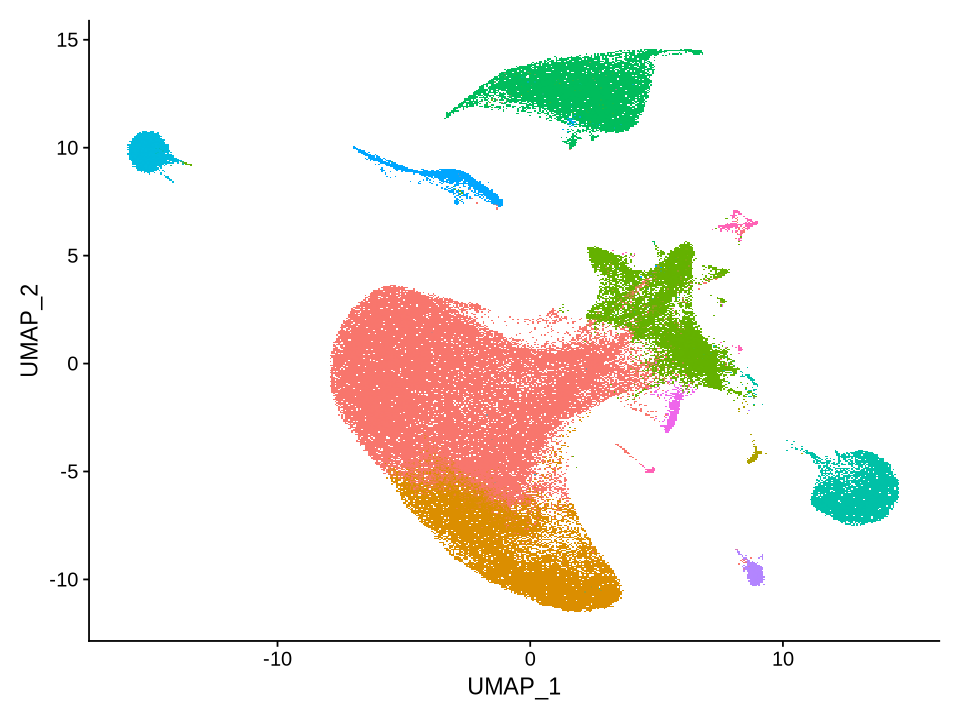

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(sc_nault_24) + NoLegend()

In [10]:
sc_nault_24_subset <- sc_nault_24

In [11]:
sc_nault_24_subset <- Biobase::ExpressionSet(assayData = as.matrix(sc_nault_24_subset@assays$RNA@counts),
                      phenoData = Biobase::AnnotatedDataFrame(data = data.frame(sc_nault_24_subset@meta.data)))

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 21.8 GiB"


In [12]:
cell_types <- c("Hepatocytes - portal", "Hepatocytes - central", "Portal Fibroblasts", "Macrophage", "Endothelial Cells", "Stellate Cells", "B Cells", "T Cells", "Cholangiocytes", "Neutrophils")

In [13]:
# sc_nault_24_markers <- FindAllMarkers(sc_nault_24, only.pos = FALSE, 
#                                   min.pct = 0.25, 
#                                   logfc.threshold = 0.25,
#                                   test.use = "wilcox",
#                                   assay = "RNA")

Calculating cluster Hepatocytes - portal

Calculating cluster Hepatocytes - central

Calculating cluster Portal Fibroblasts

Calculating cluster Macrophage

Calculating cluster Endothelial Cells



In [18]:
sc_nault_24_markers <- read.csv("03_outputs/12/cluster_markers_n24", row.names = 1)

In [20]:
#sc_nault_24_markers <- read.csv("03_outputs/12/cluster_markers_n24.csv")

In [21]:
sc_nault_24_markers <- sc_nault_24_markers %>% group_by(cluster) %>% arrange(desc(avg_log2FC), pct.1) %>% filter(pct.1 > 0.6)

In [22]:
est_prop = music_prop(bulk.eset = bulk_eset, sc.eset = sc_nault_24_subset, clusters = 'new.cell.type',
                               samples = 'orig.ident', select.ct = cell_types, verbose = T, markers = sc_nault_24_markers$gene)

Creating Relative Abundance Matrix...

Creating Variance Matrix...

Creating Library Size Matrix...

Used 271 common genes...

Used 10 cell types in deconvolution...

CDL_0002 has common genes 261 ...

CDL_0003 has common genes 263 ...

CDL_0007 has common genes 261 ...

CDL_0008 has common genes 264 ...

CDL_0009 has common genes 266 ...

CDL_0011 has common genes 265 ...

CDL_0036 has common genes 267 ...

CDL_0037 has common genes 265 ...

CDL_0038 has common genes 266 ...

CDL_0039 has common genes 263 ...

CDL_0040 has common genes 263 ...

CDL_0041 has common genes 267 ...

CDL_0044 has common genes 266 ...

CDL_0045 has common genes 267 ...

CDL_0046 has common genes 267 ...

CDL_0048 has common genes 266 ...

CDL_0049 has common genes 266 ...

CDL_0050 has common genes 268 ...

CDL_0052 has common genes 265 ...

CDL_0054 has common genes 268 ...

CDL_0055 has common genes 265 ...

CDL_0056 has common genes 264 ...

CDL_0057 has common genes 269 ...

CDL_0058 has common genes 26

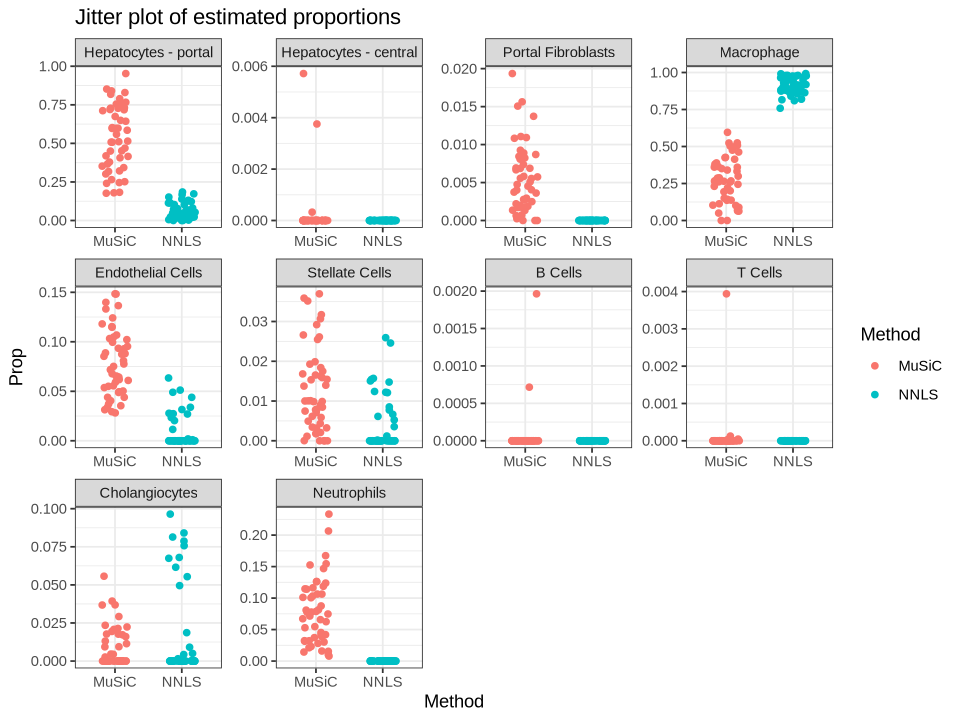

In [23]:
Jitter_Est(list(data.matrix(est_prop$Est.prop.weighted),
                             data.matrix(est_prop$Est.prop.allgene)),
                        method.name = c('MuSiC', 'NNLS'), title = 'Jitter plot of estimated proportions') + theme_bw()

In [24]:
prop_all = cbind('proportion'=c(est_prop$Est.prop.weighted), 'sampleID'=rep(rownames(est_prop$Est.prop.weighted),times=ncol(est_prop$Est.prop.weighted)), 
                 'celltype'=rep(colnames(est_prop$Est.prop.weighted), each=nrow(est_prop$Est.prop.weighted)))
prop_all = as.data.frame(prop_all)
prop_all$proportion = as.numeric(as.character(prop_all$proportion))

to_plot_n24 <- prop_all
to_plot_n24$group <- prop_all$sampleID
to_plot_n24 <- Group_CDL_samples(to_plot_n24)
#cols <-c("alpha" = "cadetblue2", "beta" = "lightsalmon1", "delta" = "palegreen2", "ductal" = "goldenrod1",
#          "gamma"="steelblue3", "acinar" = "plum2")


In [25]:
to_plot_n24 <- to_plot_n24 %>% mutate(Condition = stringr::str_extract(group, "(?<=_).*")) %>% mutate(Model = stringr::str_extract(group, "[^_]+"))

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.pointsize = 14)

n24_conditions <- ggplot(to_plot_n24, aes(x=group, y=proportion, color=Model)) + xlab('')+
  geom_jitter(width=0.25,alpha=0.8)+ylab('Cell Type Proportions')+ theme_minimal() +
  theme(panel.spacing = unit(2, "lines")) +
  stat_summary(fun = median,
               geom = "crossbar", width = 0.5,size=0.5,color='gray36')+
  facet_wrap(.~celltype, ncol = 8)+
  theme(plot.title = element_text(hjust = 0.5, size=12),
        axis.text.x = element_text(size=12,angle = 45,hjust=1),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') + 
        stat_compare_means(method = "wilcox.test", label = "p.signif", 
                    comparisons = n24_comparisons, 
                    label.y = c(0.89, 0.75, 0.70, 0.89, 0.75, 0.70))
n24_conditions
#  scale_color_manual(values=cols)

In [27]:
celltypes_selected <- to_plot_n24 %>% filter(!celltype %in% c("B Cells", "Hepatocytes - central"))
to_plot_n24_selected <- to_plot_n24 %>% filter(celltype %in% celltypes_selected$celltype)

In [ ]:
to_plot_n24_selected <- to_plot_n24_selected %>% mutate(Condition = stringr::str_extract(group, "(?<=_).*")) %>% mutate(Model = stringr::str_extract(group, "[^_]+"))

In [29]:
n24_comparisons <- list(c("CCL4_Cneg", "CCL4_Cpos"), 
                        c("CCL4_Cpos", "CCL4_R1"), 
                        c("CCL4_R1", "CCL4_R2"),
                        c("TAA_Cneg", "TAA_Cpos"),
                        c("TAA_Cpos", "TAA_R1"),
                        c("TAA_R1", "TAA_R2"))

In [30]:
ann_colors <- list(Group = c(`R1` = "#57b09c", `R2` = "#55dfa7", Cneg = "#dc97b3",
  Cpos = "#da4370"), Model = c(CCL4 = "#063852", TAA = "#F0810F"))


In [31]:
group_cols <- c("#dc97b3", "#da4370", "#57b09c", "#55dfa7")

In [32]:
  to_plot_n24_selected <- to_plot_n24_selected %>% group_by(celltype, Model) %>%
    mutate(proportion = proportion / sum(proportion) * 100) %>%
    ungroup()

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)


p_n24_fin <- ggplot(to_plot_n24_selected, aes(x= Model, 
            y = proportion, 
            fill = Condition)) + 
  xlab('') +
  geom_col(width=0.8,alpha=0.8) +
  ylab('Cell type proportions') +
  facet_wrap(.~celltype, ncol = 4) +
  theme(plot.title = element_text(hjust = 0.5, size=12),
        axis.text.x = element_text(size=12,angle = 45,hjust=1),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') + 
        labs(color='Groups')  +
        theme_minimal() +
        theme(panel.spacing = unit(2, "lines"),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        scale_fill_manual(values = group_cols)
#       stat_compare_means(method = "wilcox.test", label = "p.signif", 
#                          comparisons = n24_comparisons, 
#                          label.y = c(0.89, 0.75, 0.70, 0.89, 0.75, 0.70)) + 
#        stat_compare_means(label.y = 105, label.x = 2, label = "p.signif")

p_n24_fin
#  scale_color_manual(values=cols)

## Ramachandran - preparation

In [ ]:
sc_healthy <- Read10X("01_raw_data/deconvolution/GSM4041174")
sc_fibrotic <- Read10X("01_raw_data/deconvolution/GSM4041175")
sc_healthy <- CreateSeuratObject(counts = sc_healthy, project = "healthy", min.cells = 3,
  min.features = 200)
sc_healthy[["percent.mt"]] <- PercentageFeatureSet(sc_healthy, pattern = "^mt-")
sc_fibrotic <- CreateSeuratObject(counts = sc_fibrotic, project = "fibrotic", min.cells = 3,
  min.features = 200)
sc_fibrotic[["percent.mt"]] <- PercentageFeatureSet(sc_fibrotic, pattern = "^mt-")
sc_fibrotic <- subset(sc_fibrotic, subset = nFeature_RNA > 200 & nFeature_RNA < 3000 &
  percent.mt < 5)
sc_healthy <- subset(sc_healthy, subset = nFeature_RNA > 200 & nFeature_RNA < 3000 &
  percent.mt < 5)
samples_list <- list(sc_fibrotic, sc_healthy)
samples_list <- lapply(X = samples_list, FUN = SCTransform, vst.flavor = "v2")
features <- SelectIntegrationFeatures(object.list = samples_list, nfeatures = 3000)
samples_list <- PrepSCTIntegration(object.list = samples_list, anchor.features = features)
samples_ancors <- FindIntegrationAnchors(object.list = samples_list, normalization.method = "SCT",
    anchor.features = features)
samples_combined_sct <- IntegrateData(anchorset = samples_ancors, normalization.method = "SCT")
samples_combined_sct <- RunPCA(samples_combined_sct, verbose = FALSE)
samples_combined_sct <- RunUMAP(samples_combined_sct, reduction = "pca", dims = 1:30)
samples_combined_sct <- FindNeighbors(samples_combined_sct, reduction = "pca", dims = 1:30)
#samples_combined_sct <- FindClusters(samples_combined_sct, resolution = c(seq(0.6, 2.0, by = 0.2)))
#options(repr.plot.width = 14, repr.plot.height = 12)
#clustree(samples_combined_sct)
samples_combined_sct <- FindClusters(samples_combined_sct, resolution = 0.6)
cluster_markers_ramachandran <- FindAllMarkers(samples_combined_sct, only.pos = FALSE, 
                                  min.pct = 0.25, 
                                  logfc.threshold = 1.5,
                                  test.use = "wilcox",
                                  assay = "RNA")

cluster_markers_ramachandran <- cluster_markers_ramachandran %>%
  group_by(cluster)

for (i in 1:nrow(samples_combined_sct@meta.data)){
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "0"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'pDC_1_Siglech_Sell'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "1"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Kupffer_cells_1'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "2"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Kupffer_cells_Vsig4_Marco'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "3"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'pDC_2'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "4"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Kupffer_cells_Cd63_Lgals3bp'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "5"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'cDC'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "6"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Kupffer_cells_3'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "7"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Tissue_monocytes'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "8"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'HSC'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "9"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'T_B_Erythroid'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "10"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Mix'
    }  
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "11"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Macrophages'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "12"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'B_cells'
    }
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "13"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Tissue_monocytes_2'
    } 
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "14"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Plasma_cells'
    } 
        if(samples_combined_sct@meta.data$seurat_clusters[i] == "15"){
        samples_combined_sct@meta.data$clusters_meta[i] <- 'Mix_2'
    } 
}

samples_combined_sct <- RenameIdents(object = samples_combined_sct, "0" = "pDC_1_Siglech_Sell")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "1" = "Kupffer_cells_1")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "2" = "Kupffer_cells_Vsig4_Marco")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "3" = "pDC_2")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "4" = "Kupffer_cells_Cd63_Lgals3bp")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "5" = "cDC")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "6" = "Kupffer_cells_3")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "7" = "Tissue_monocytes")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "8" = "HSC")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "9" = "T_B_Erythroid")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "10" = "Mix")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "11" = "Macrophages")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "12" = "B_cells")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "13" = "Tissue_monocytes_2")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "14" = "Plasma_cells")
samples_combined_sct <- RenameIdents(object = samples_combined_sct, "15" = "Mix_2")

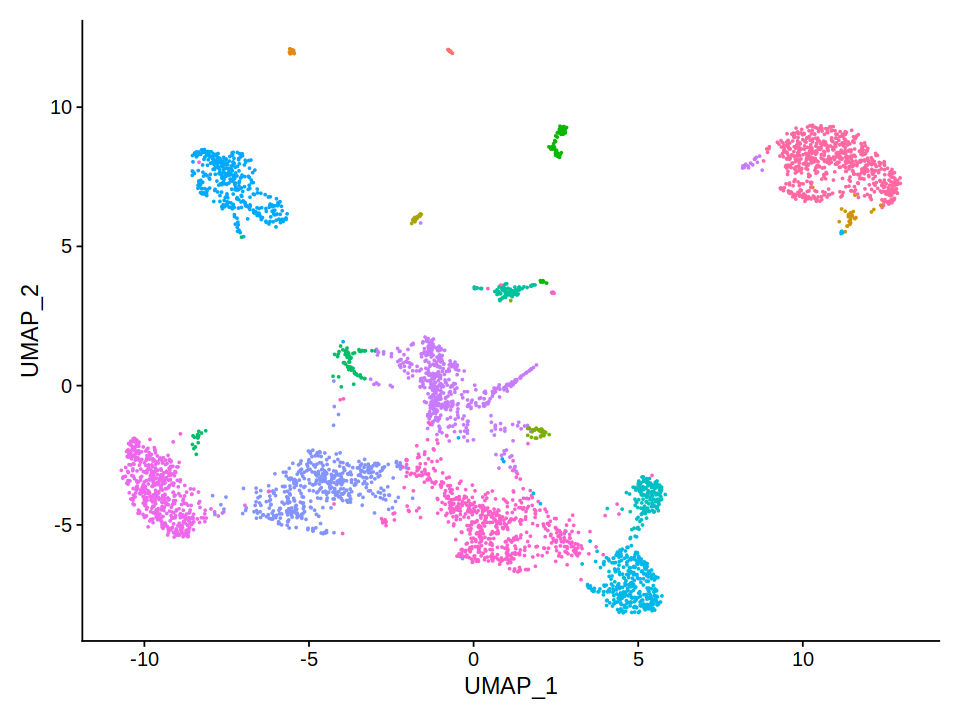

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)
DimPlot(samples_combined_sct) + NoLegend()

In [ ]:
#cluster_markers_ramachandran <- read.csv("03_outputs/12/cluster_markers_ramachandran.csv")

In [ ]:
cluster_markers_ramachandran_prep <- cluster_markers_ramachandran %>% group_by(cluster) %>% arrange(desc(avg_log2FC), pct.1) %>% filter(pct.1 > 0.6)

In [ ]:
sc_ramachandran <- samples_combined_sct

In [ ]:
samples_combined_sct <- Biobase::ExpressionSet(assayData = as.matrix(samples_combined_sct@assays$RNA@counts),
                      phenoData = Biobase::AnnotatedDataFrame(data = data.frame(samples_combined_sct@meta.data)))

In [ ]:
cell_types_ramachandran <- c('HSC', 'Kupffer_cells_3', 'Kupffer_cells_Cd63_Lgals3bp', 'Kupffer_cells_1', 'cDC', 'Kupffer_cells_Vsig4_Marco', 'pDC_1_Siglech_Sell', 'pDC_2', 'Tissue_monocytes', 'B_cells', 'Plasma_cells', 'Macrophages', 
'Tissue_monocytes_2')

## Deconvolution

In [ ]:
est_prop_ramachandran = music_prop(bulk.eset = bulk_eset, sc.eset = samples_combined_sct, clusters = 'clusters_meta',
                               samples = 'orig.ident', select.ct = cell_types_ramachandran, verbose = T,  markers = cluster_markers_ramachandran_prep$gene)

Creating Relative Abundance Matrix...

Creating Variance Matrix...

Creating Library Size Matrix...

Used 326 common genes...

Used 13 cell types in deconvolution...

CDL_0002 has common genes 312 ...

CDL_0003 has common genes 311 ...

CDL_0007 has common genes 309 ...

CDL_0008 has common genes 308 ...

CDL_0009 has common genes 319 ...

CDL_0011 has common genes 316 ...

CDL_0036 has common genes 321 ...

CDL_0037 has common genes 323 ...

CDL_0038 has common genes 322 ...

CDL_0039 has common genes 323 ...

CDL_0040 has common genes 320 ...

CDL_0041 has common genes 323 ...

CDL_0044 has common genes 322 ...

CDL_0045 has common genes 320 ...

CDL_0046 has common genes 317 ...

CDL_0048 has common genes 322 ...

CDL_0049 has common genes 319 ...

CDL_0050 has common genes 320 ...

CDL_0052 has common genes 315 ...

CDL_0054 has common genes 324 ...

CDL_0055 has common genes 319 ...

CDL_0056 has common genes 320 ...

CDL_0057 has common genes 320 ...

CDL_0058 has common genes 32

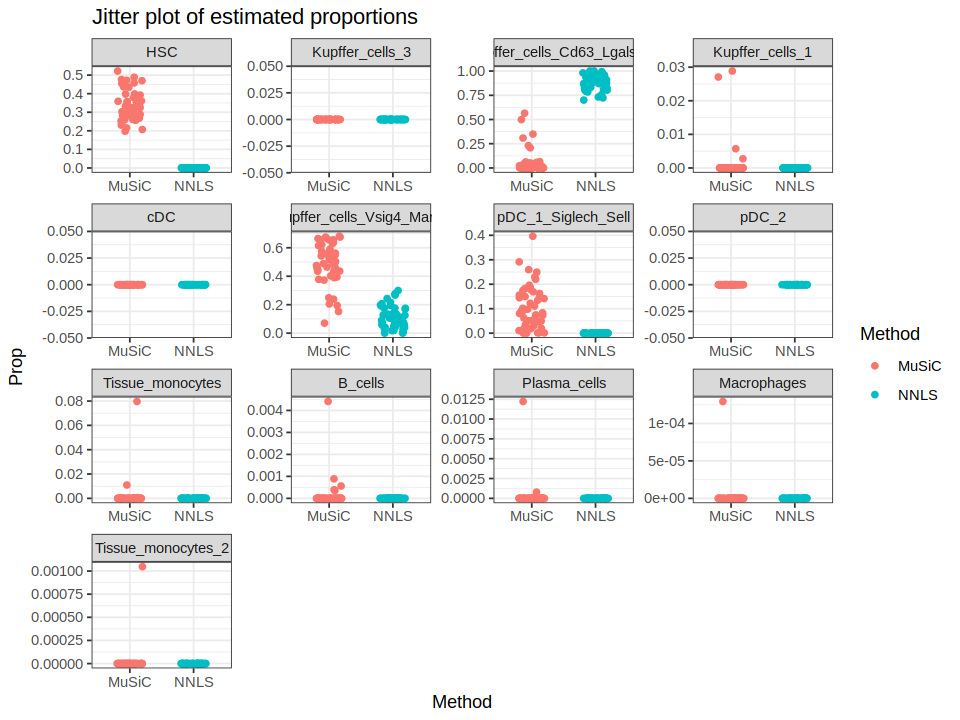

In [ ]:
p_ramachandran_conditions <- Jitter_Est(list(data.matrix(est_prop_ramachandran$Est.prop.weighted),
                             data.matrix(est_prop_ramachandran$Est.prop.allgene)),
                        method.name = c('MuSiC', 'NNLS'), title = 'Jitter plot of estimated proportions') + theme_bw()
p_ramachandran_conditions

In [ ]:
prop_all_ramachandran = cbind('proportion'=c(est_prop_ramachandran$Est.prop.weighted), 
                              'sampleID'=rep(rownames(est_prop_ramachandran$Est.prop.weighted),
                                             times=ncol(est_prop_ramachandran$Est.prop.weighted)), 
                 'celltype'=rep(colnames(est_prop_ramachandran$Est.prop.weighted), 
                                each=nrow(est_prop_ramachandran$Est.prop.weighted)))
prop_all_ramachandran = as.data.frame(prop_all_ramachandran)
prop_all_ramachandran$proportion = as.numeric(as.character(prop_all_ramachandran$proportion))

to_plot_combined <- prop_all_ramachandran
to_plot_combined$group <- prop_all_ramachandran$sampleID
to_plot_combined <- Group_CDL_samples(to_plot_combined)
#cols <-c("alpha" = "cadetblue2", "beta" = "lightsalmon1", "delta" = "palegreen2", "ductal" = "goldenrod1",
#          "gamma"="steelblue3", "acinar" = "plum2")


In [ ]:
prop_all_ramachandran_nnls = cbind('proportion'=c(est_prop_ramachandran$Est.prop.allgene), 
                              'sampleID'=rep(rownames(est_prop_ramachandran$Est.prop.allgene),
                                             times=ncol(est_prop_ramachandran$Est.prop.allgene)), 
                 'celltype'=rep(colnames(est_prop_ramachandran$Est.prop.allgene), 
                                each=nrow(est_prop_ramachandran$Est.prop.allgene)))
prop_all_ramachandran_nnls = as.data.frame(prop_all_ramachandran_nnls)
prop_all_ramachandran_nnls$proportion_nnls = as.numeric(as.character(prop_all_ramachandran_nnls$proportion))

to_plot_combined_nnls <- prop_all_ramachandran_nnls
to_plot_combined_nnls$group <- prop_all_ramachandran_nnls$sampleID
to_plot_combined_nnls <- Group_CDL_samples(to_plot_combined_nnls)
#cols <-c("alpha" = "cadetblue2", "beta" = "lightsalmon1", "delta" = "palegreen2", "ductal" = "goldenrod1",
#          "gamma"="steelblue3", "acinar" = "plum2")



In [ ]:
nnls_mf <- to_plot_combined_nnls %>% subset(celltype == "Kupffer_cells_Cd63_Lgals3bp") %>% select(-proportion) %>% rename(proportion = proportion_nnls)
to_plot_combined <- to_plot_combined %>% subset(!celltype == "Kupffer_cells_Cd63_Lgals3bp") 
to_plot_combined <- rbind(to_plot_combined, nnls_mf)

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.pointsize = 14)

combined_conditions <- ggplot(to_plot_combined, aes(x=group, y=proportion)) + xlab('')+
  geom_jitter(aes(color=group), width=0.25,alpha=0.8)+ylab('Cell Type Proportions')+ theme_minimal() +
  theme(panel.spacing = unit(2, "lines")) +
  stat_summary(fun = median,
               geom = "crossbar", width = 0.5,size=0.5,color='gray36')+
  facet_wrap(.~celltype, ncol = 8)+
  theme(plot.title = element_text(hjust = 0.5, size=12),
        axis.text.x = element_text(size=12,angle = 45,hjust=1),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') +
#  scale_color_manual(values=cols)
      stat_compare_means(method = "wilcox.test", label = "p.signif", 
                         comparisons = n24_comparisons, 
                         label.y = c(0.89, 0.75, 0.70, 0.89, 0.75, 0.70))

combined_conditions


In [ ]:
to_plot_combined_selected <- to_plot_combined %>% filter(!celltype %in% c("Macrophages", "Plasma_cells", "B_cells", "Tissue_monocytes", "Tissue_monocytes_2", "cDC", "pDC_2", "Kupffer_cells_1", "Kupffer_cells_3"))
to_plot_combined_selected %>% mutate(Model = stringr::str_extract(group, "[^_]+"))

In [ ]:
to_plot_combined_selected <- to_plot_combined_selected %>% mutate(Condition = stringr::str_extract(group, "(?<=_).*")) %>% mutate(Model = stringr::str_extract(group, "[^_]+"))

In [ ]:
combined_comparisons <- list(c("CCL4_Cneg", "CCL4_Cpos"), 
                        c("CCL4_Cpos", "CCL4_R1"), 
                        c("CCL4_R1", "CCL4_R2"),
                        c("TAA_Cneg", "TAA_Cpos"),
                        c("TAA_Cpos", "TAA_R1"),
                        c("TAA_R1", "TAA_R2"))

In [ ]:
group_cols <- c("#dc97b3", "#da4370", "#57b09c", "#55dfa7")

In [ ]:
group_cols <- c("#dc97b3", "#da4370", "#57b09c", "#55dfa7")

In [ ]:
  to_plot_combined_selected <- to_plot_combined_selected %>% group_by(celltype, Model) %>%
    mutate(proportion = proportion / sum(proportion) * 100) %>%
    ungroup()

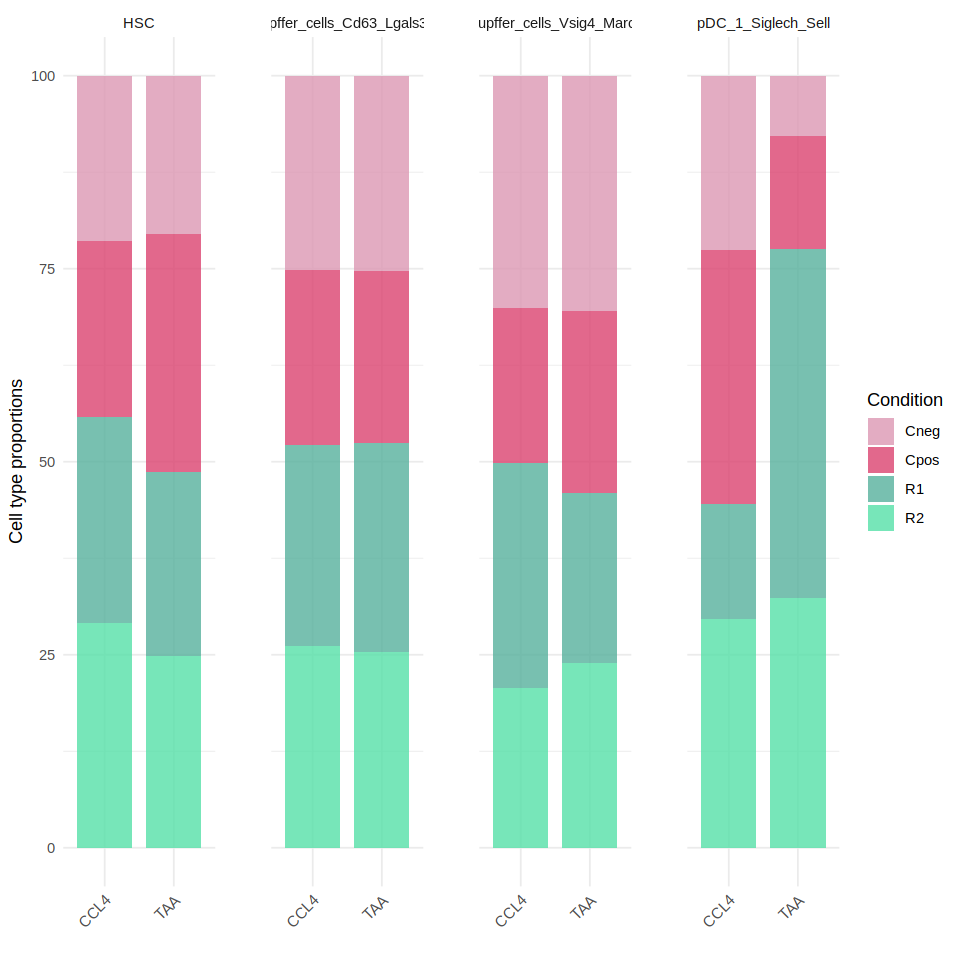

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)


p_ramachandran_fin <- ggplot(to_plot_combined_selected, aes(x= Model, 
            y = proportion, 
            fill = Condition)) + 
  xlab('') +
  geom_col(width=0.8,alpha=0.8) +
  ylab('Cell type proportions') +
  facet_wrap(.~celltype, ncol = 4) +
  theme(plot.title = element_text(hjust = 0.5, size=12),
        axis.text.x = element_text(size=12,angle = 45,hjust=1),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=10),
        axis.title.y = element_text(size=12),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') + 
        labs(color='Groups')  +
        theme_minimal() +
        theme(panel.spacing = unit(2, "lines"),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        scale_fill_manual(values = group_cols)
#       stat_compare_means(method = "wilcox.test", label = "p.signif", 
#                          comparisons = n24_comparisons, 
#                          label.y = c(0.89, 0.75, 0.70, 0.89, 0.75, 0.70)) + 
#        stat_compare_means(label.y = 105, label.x = 2, label = "p.signif")

p_ramachandran_fin
#  scale_color_manual(values=cols)

## Heatmap

In [ ]:
combined <- rbind(to_plot_n24_selected, to_plot_combined_selected)

In [ ]:
combined_to_heatmap <- combined %>% select(sampleID, celltype, proportion) %>% tidyr::pivot_wider(names_from = sampleID, values_from = proportion) %>% tibble::column_to_rownames("celltype")

In [ ]:
order_merged <- as.data.frame(colData(dds)[, c("Group", "Batch")]) %>% dplyr::select("Group") %>% dplyr::arrange(factor(Group, levels = c("Cneg", "Cpos", "12WR1", "12WR2")))
ann_colors <- list(Group = c(Cneg = "#dc97b3", Cpos = "#da4370", `12WR1` = "#57b09c", `12WR2` = "#55dfa7"))
combined_to_heatmap <- combined_to_heatmap[ , rownames(order_merged)]

In [ ]:
selected_cells_heatmap <- filter(combined_to_heatmap, rownames(combined_to_heatmap) %in% c("Hepatocytes - portal", "Macrophage", "Endothelial Cells", "Stellate Cells"))

In [ ]:
rows_order <- c("Macrophage", "Stellate Cells", "Endothelial Cells", "Hepatocytes - portal")

In [ ]:
selected_cells_heatmap <- selected_cells_heatmap[match(rows_order, rownames(selected_cells_heatmap)),]

In [ ]:
colfunc <- colorRampPalette(c("#9f294c", "#e4f0ff", "#27678a"))
col_100 <- colfunc(100)
col_100 <- col_100[rev(1:length(col_100))]

In [ ]:
pheatmap(scale(as.matrix(selected_cells_heatmap)), color = col_100,
  show_rownames = TRUE, cluster_cols = FALSE,
  cluster_rows = FALSE,
  show_colnames = FALSE, angle_col = "45",
  clustering_method = "ward.D2",
  annotation_col = annotation,
  cutree_rows = 4,
  annotation_colors = ann_colors,
  fontsize_number=6,
  gaps_col = c(12, 24, 36, 48))

## Top perturbation scores in sing-cell

In [10]:
scores_df <- read.csv("03_outputs/03_2/scores_merged_dataframe.csv")

In [11]:
top_cir_genes <- scores_df %>% arrange(desc(cirrhosis_score)) %>% top_n(50) %>% unique()

Selecting by cirrhosis_score


In [12]:
top_reg_genes <- scores_df %>% arrange(desc(regression_score)) %>% top_n(50) %>% unique()

Selecting by cirrhosis_score


Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
"The following requested variables were not found: Inava, Spire2"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
"Removed 481 rows containing missing values (`geom_point()`)."


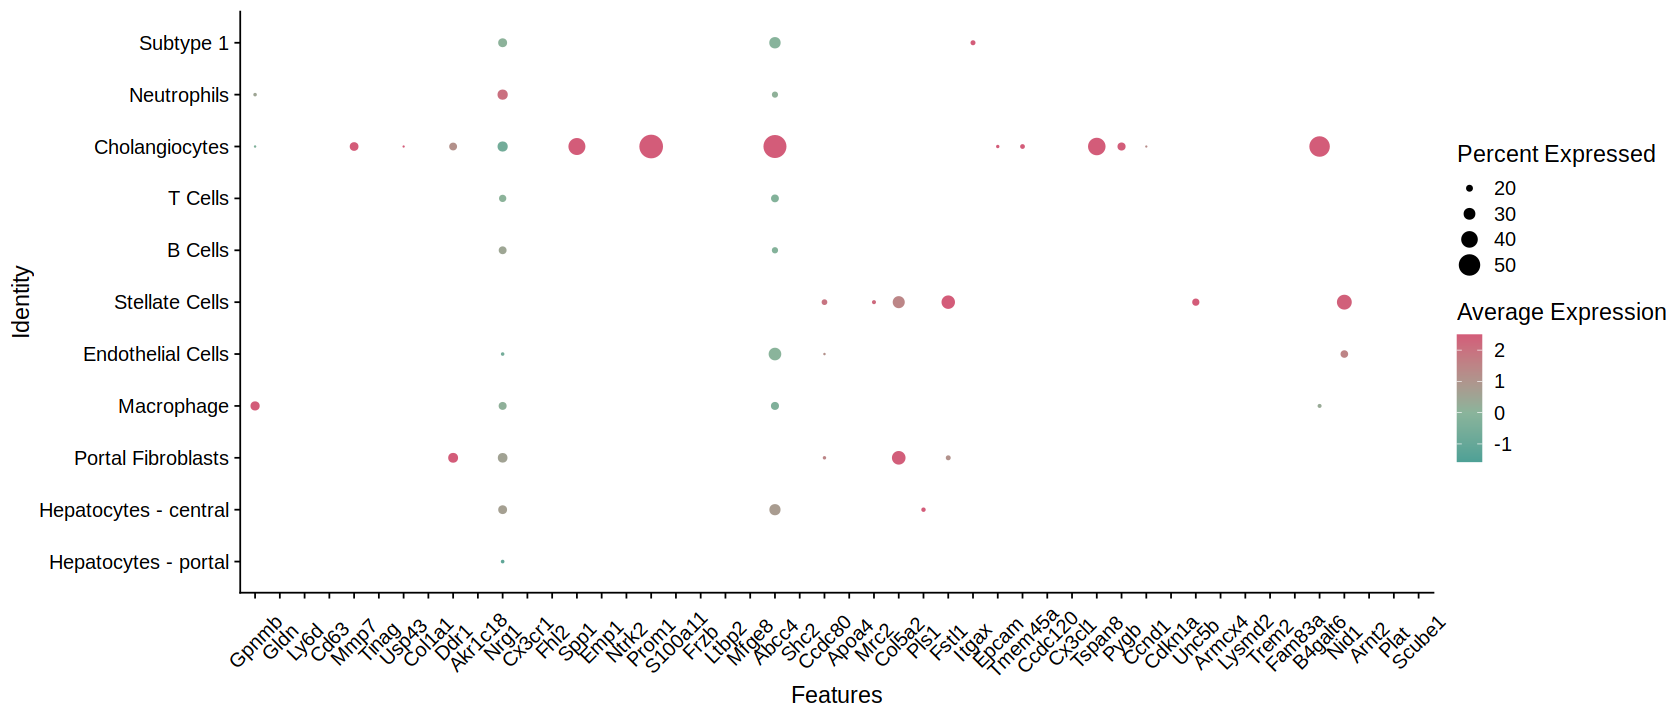

In [16]:
options(repr.plot.width = 14, repr.plot.height = 6)


DotPlot(sc_nault_24, features = top_cir_genes$gene, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)


DotPlot(samples_combined_sct, assay = "SCT", features = top_cir_genes$gene, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")

In [19]:
cir_hub <- read.csv("03_outputs/14/cir_hub.csv")
reg_hub <- read.csv("03_outputs/14/reg_hub.csv")
pp_hub <- read.csv("03_outputs/14/pp_hub.csv")
cpa_hub <- read.csv("03_outputs/14/cpa_hub.csv")

In [21]:
cir_hub <- cir_hub$from
reg_hub <- reg_hub$from
pp_hub <- pp_hub$from
cpa_hub <- cpa_hub$from

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 6)


DotPlot(sc_nault_24, features = cir_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(sc_nault_24, features = reg_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(sc_nault_24, features = pp_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(sc_nault_24, features = cpa_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")

In [ ]:

DotPlot(samples_combined_sct, features = cir_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(samples_combined_sct, features = reg_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(samples_combined_sct, features = pp_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")
DotPlot(samples_combined_sct, features = cpa_hub, dot.min = 0.1) + theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5)) + scale_colour_gradient2(low = "#009593", mid = "#8AB49B", high = "#D35C79")

## Outputs

In [68]:
unique(combined$celltype)

[1] "Hepatocytes - portal"        "Portal Fibroblasts"         
 [3] "Macrophage"                  "Endothelial Cells"          
 [5] "Stellate Cells"              "T Cells"                    
 [7] "Cholangiocytes"              "Neutrophils"                
 [9] "HSC"                         "Kupffer_cells_Vsig4_Marco"  
[11] "pDC_1_Siglech_Sell"          "Kupffer_cells_Cd63_Lgals3bp"

In [50]:
combined$celltype <- factor(combined$celltype, levels = c("HSC", "Kupffer_cells_Cd63_Lgals3bp", "Kupffer_cells_Vsig4_Marco", "pDC_1_Siglech_Sell", "Portal Fibroblasts", "Stellate Cells", "Endothelial Cells", "Macrophage", "T Cells", "Neutrophils", "Cholangiocytes", "Hepatocytes - portal"))

In [147]:
combined_wide <- combined %>% tidyr::spread(celltype, proportion)

In [150]:
write.csv(combined_wide, file = "03_outputs/11/combined_wide.csv")

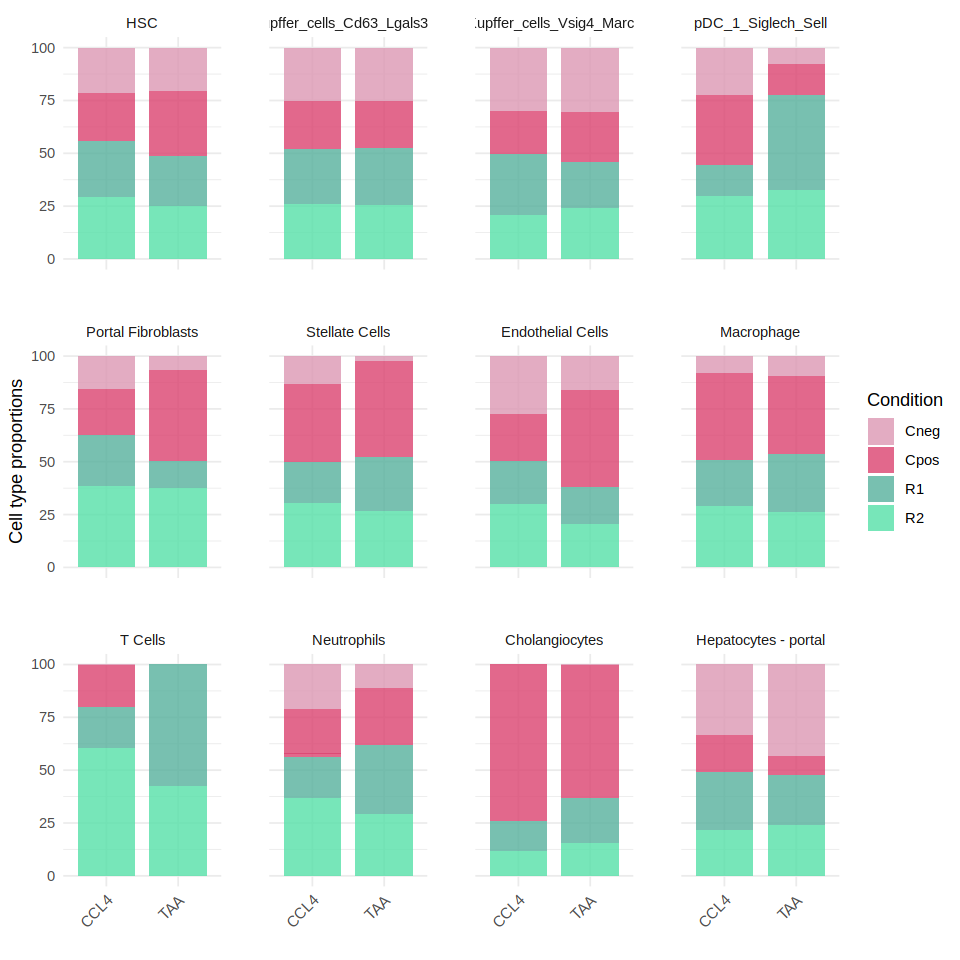

In [52]:
options(repr.plot.width = 8, repr.plot.height = 8)


p_combined <- ggplot(combined, aes(x= Model, 
            y = proportion, 
            fill = Condition)) + 
  xlab('') +
  geom_col(width=0.8,alpha=0.8) +
  ylab('Cell type proportions') +
  facet_wrap(.~celltype, ncol = 4) +
  theme(plot.title = element_text(hjust = 0.5, size=12),
        axis.text.x = element_text(size=12,angle = 45,hjust=1),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(size=12),
        axis.title.y = element_text(size=12),
        axis.line = element_line(colour = "black"),
        strip.text.x = element_text(size = 12),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        legend.position = 'none') + 
        labs(color='Groups')  +
        theme_minimal() +
        theme(panel.spacing = unit(2, "lines"),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +
        scale_fill_manual(values = group_cols)
#       stat_compare_means(method = "wilcox.test", label = "p.signif", 
#                          comparisons = n24_comparisons, 
#                          label.y = c(0.89, 0.75, 0.70, 0.89, 0.75, 0.70)) + 
#        stat_compare_means(label.y = 105, label.x = 2, label = "p.signif")

p_combined
#  scale_color_manual(values=cols)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



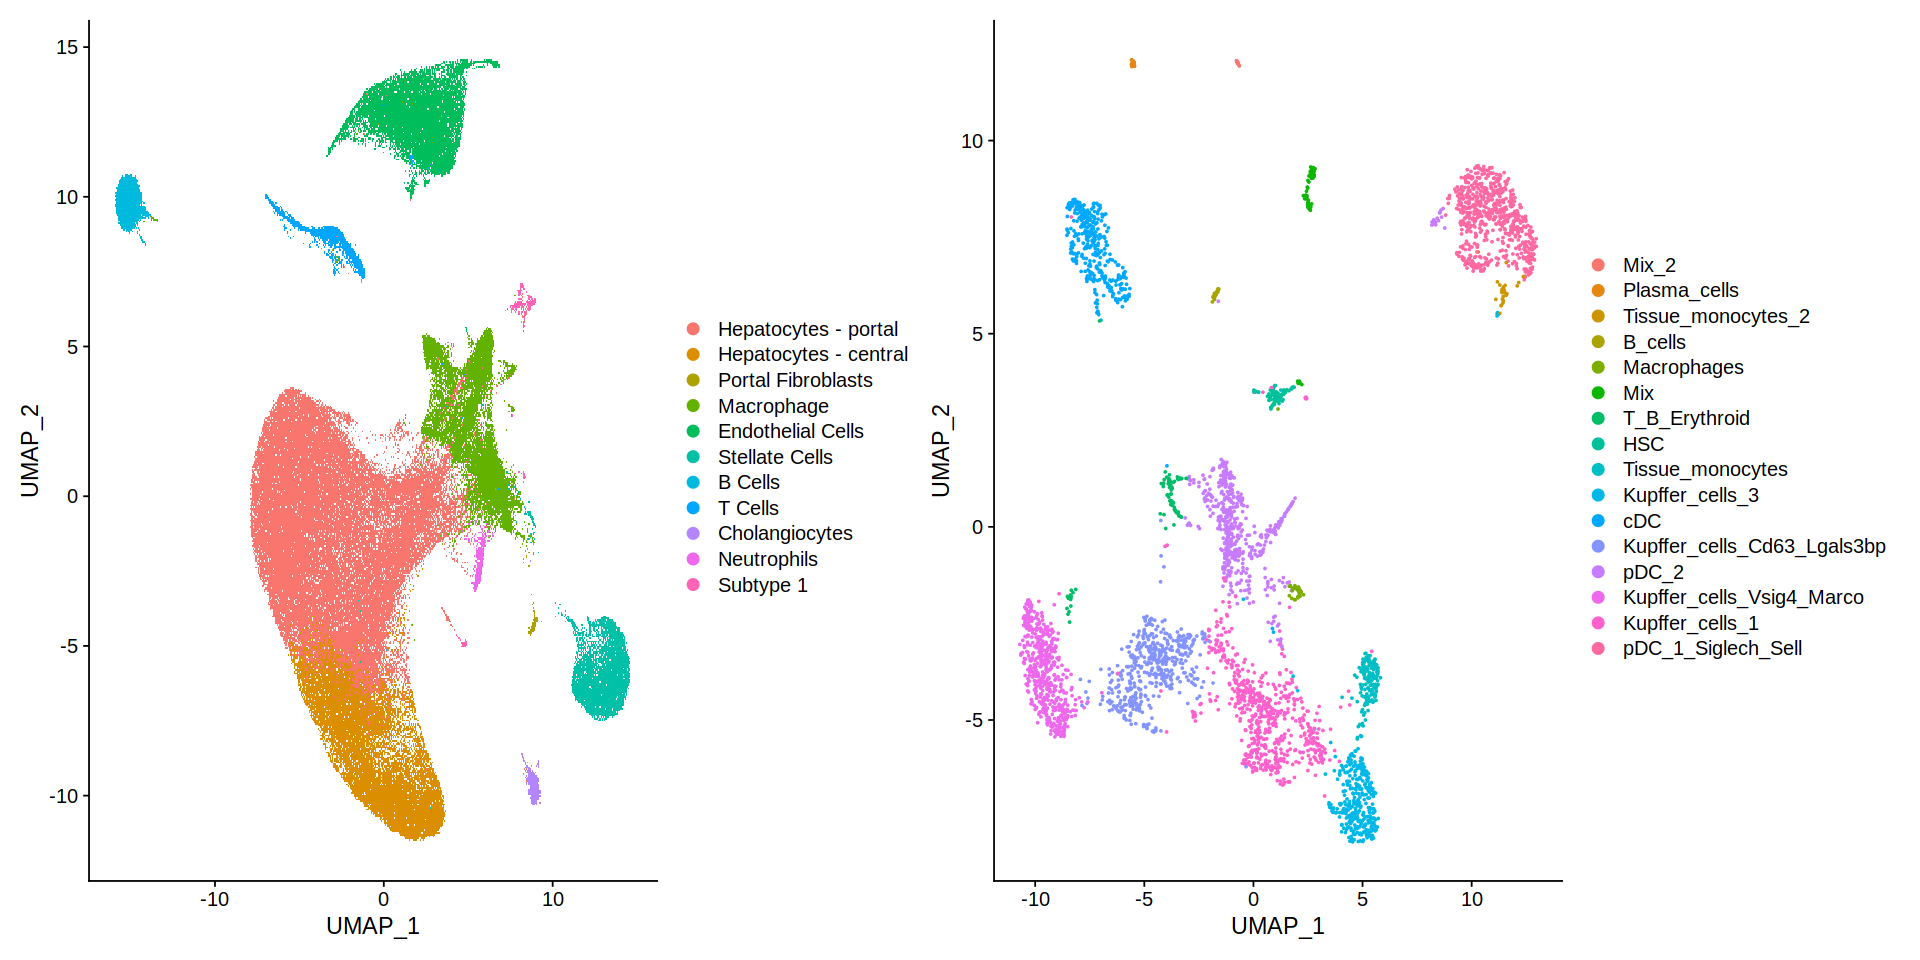

In [53]:
options(repr.plot.width = 16, repr.plot.height = 8)

p1 <- DimPlot(sc_nault_24) 
p2 <- DimPlot(sc_ramachandran)
p1 + p2

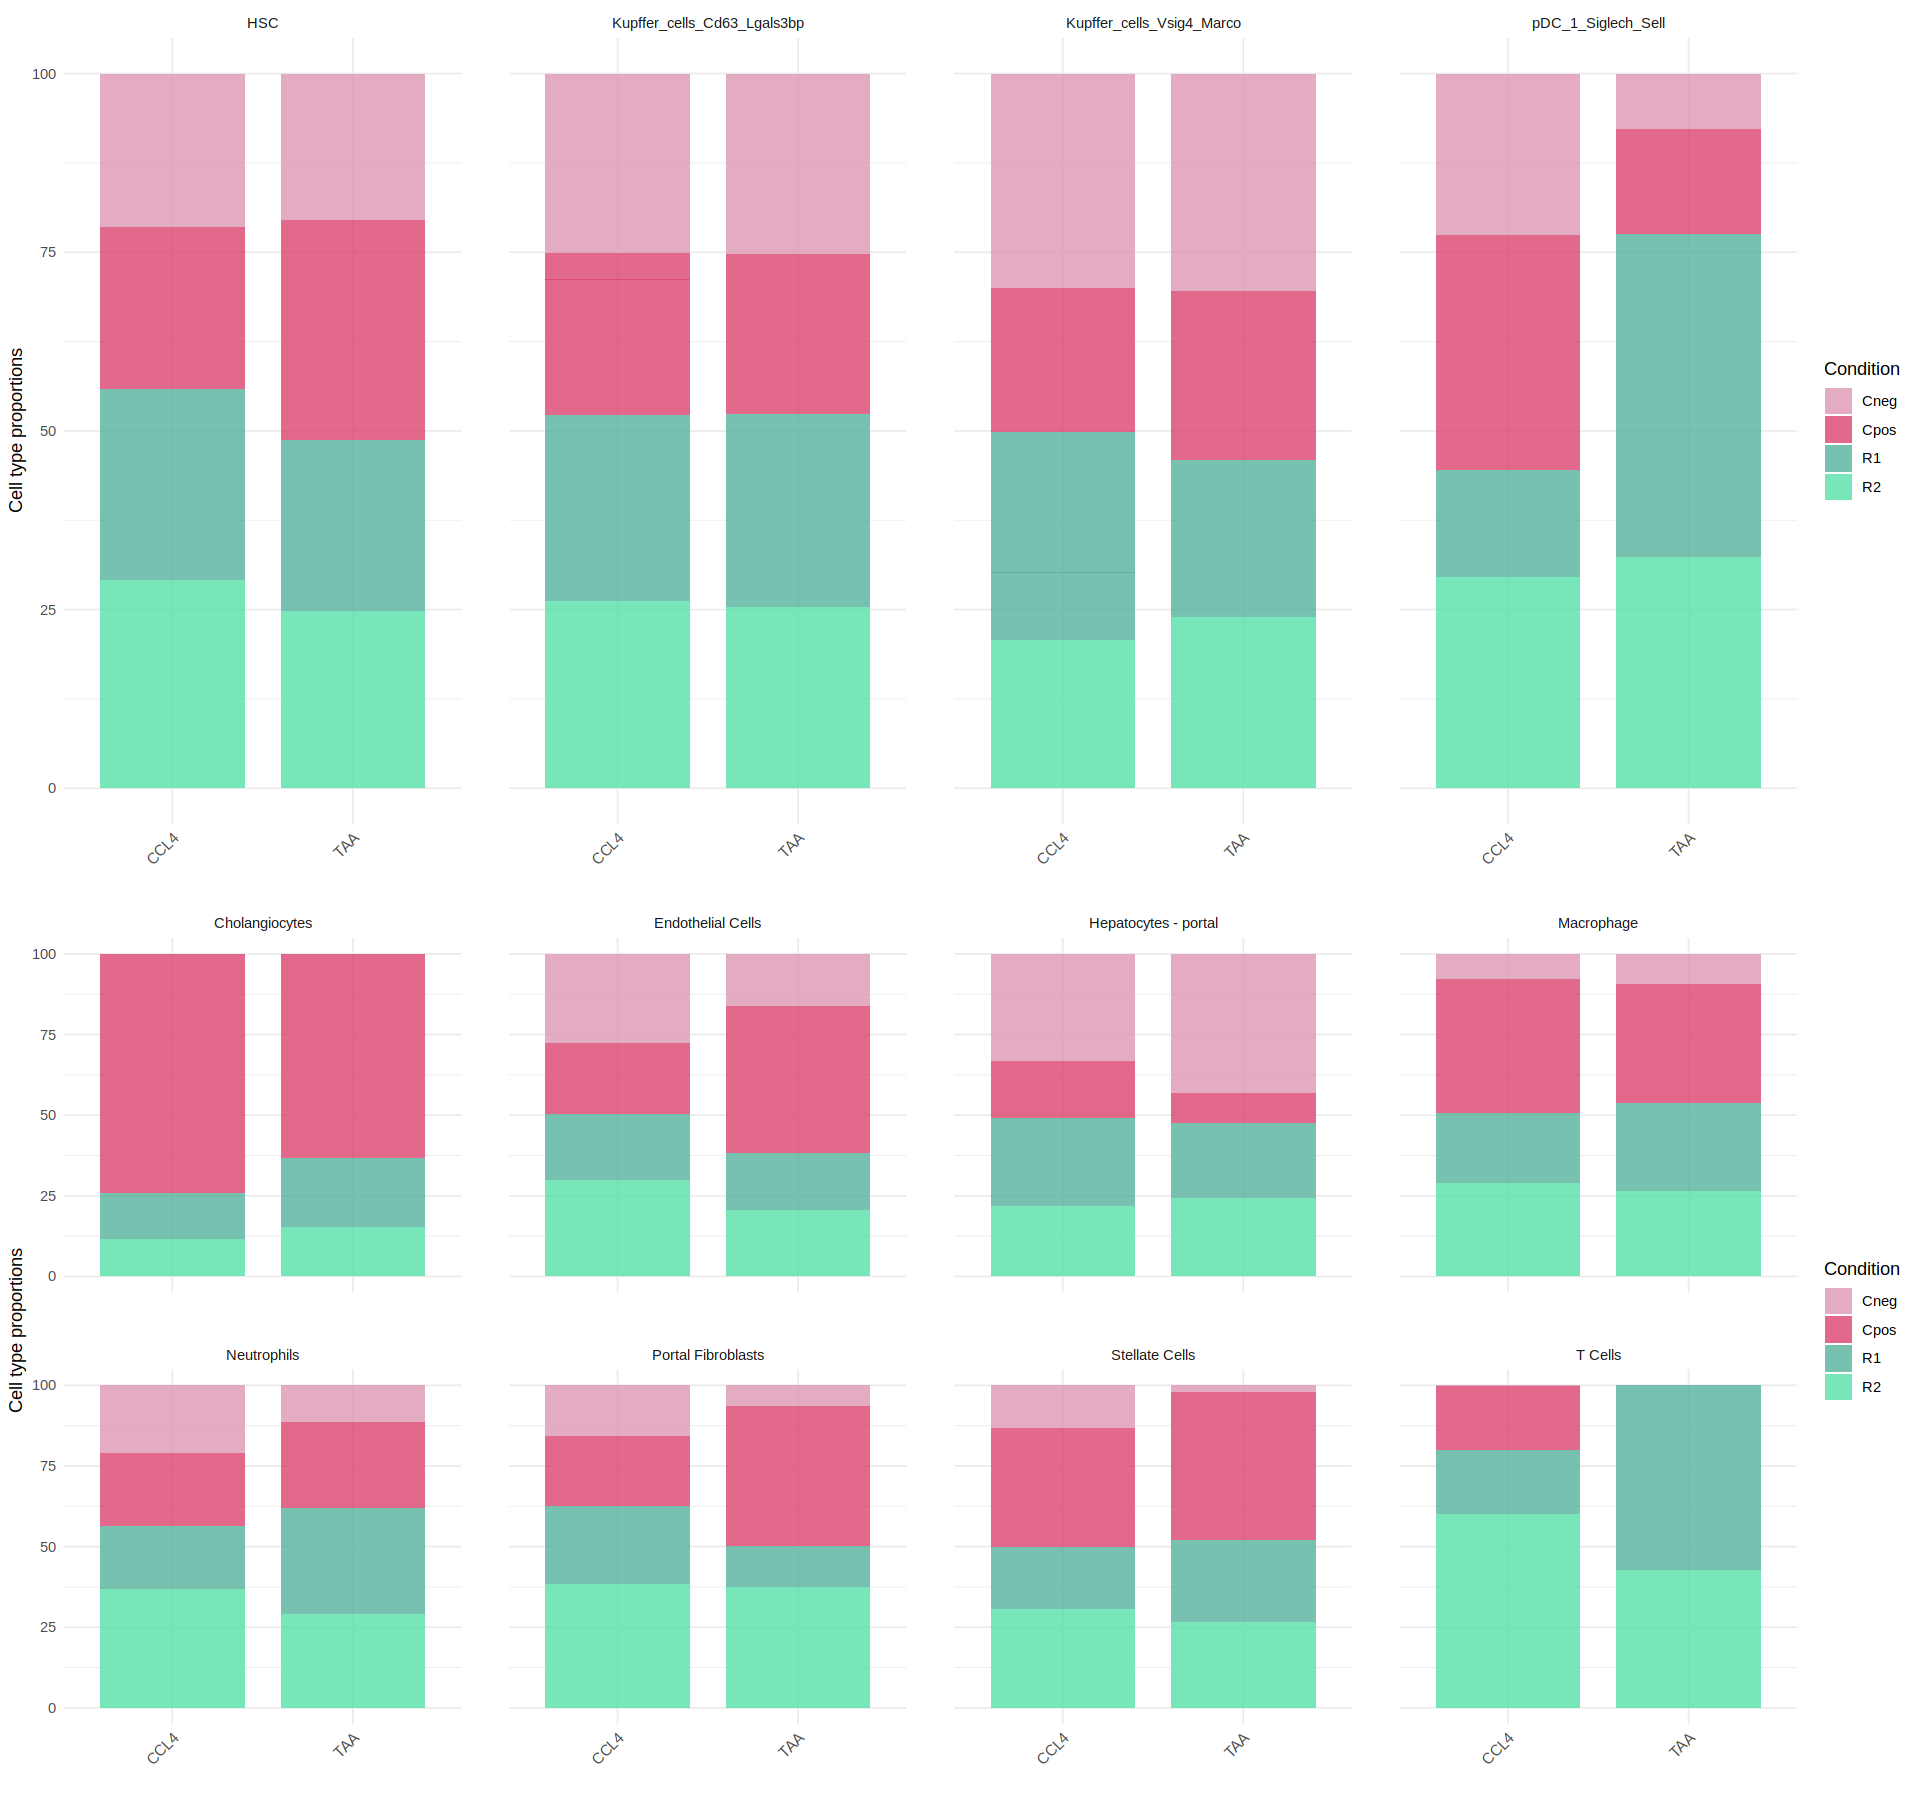

In [54]:
options(repr.plot.width = 16, repr.plot.height = 15)
ggpubr::ggarrange(p_ramachandran_fin, p_n24_fin, ncol = 1, nrow = 2)

In [55]:
ggsave("03_outputs/12/n24_fin.png", p_n24_fin, device = "png", width = 10, height = 5)
ggsave("03_outputs/12/ramachandran_fin.png", p_ramachandran_fin, device = "png", width = 10, height = 5)
#save(p_n24_fin, file = "03_outputs/12/n24_fin.rdata")

In [56]:
#ggsave("03_outputs/12/ramachandran_fin.png", p_combined_fin, device = "png", width = 8, height = 5)
#save(p_combined_fin, file = "03_outputs/12/ramachandran_fin.rdata")

In [57]:
ggsave("03_outputs/12/ramachandran_conditions.png", p_ramachandran_conditions, device = "png", width = 8, height = 5)
save(p_ramachandran_conditions, file = "03_outputs/12/ramachandran_conditions.rdata")

In [58]:
ggsave("03_outputs/12/n24_conditions.png", n24_conditions, device = "png", width = 10, height = 10)
save(n24_conditions, file = "03_outputs/12/n24_conditions.rdata")

In [59]:
write.csv(combined_wide, "03_outputs/12/combined_wide.csv")

In [61]:
write.csv(cluster_markers_ramachandran, "03_outputs/12/cluster_markers_ramachandran.csv")
write.csv(sc_nault_24_markers, "03_outputs/12/cluster_markers_nault_24.csv")